# Twitter Sentiment Analysis

### Objective : Build a sentiment analysis program that parses text from tweets fetched from Twitter

# 1. Import Dependencies

In [0]:
# import libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# import data
from google.colab import files
uploaded = files.upload()

Saving login.csv to login.csv


In [0]:
# load twitter authentication credentials
log = pd.read_csv('login.csv')

# 2. Dataset exploration and Twitter authentication settings

In [0]:
# store Twitter API credentials
consumerKey = log['key'][0]
consumerSecret = log['key'][1]
accessToken = log['key'][2]
accessTokenSecret = log['key'][3]

In [0]:
# create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

In [0]:
# set the access token and secret
authenticate.set_access_token(accessToken, accessTokenSecret)

In [0]:
# create the API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit=True)

# 3. Extract tweets from a Twitter user - Bill Gates



In [0]:
# extract 100 tweets from Bill Gates Twitter account
posts = api.user_timeline(screen_name = "BillGates", count=100, lang='en', tweet_mode='extended')

In [10]:
# show last 5 tweets
print("Show the recent 5 tweets: \n")
i = 1
for tweet in posts[0:5]:
  print(str(i) + ') ' + tweet.full_text + '\n')
  i += 1

Show the recent 5 tweets: 

1) RT @MSuzman: The world must work together to slow the coronavirus outbreak, protect the most vulnerable, &amp; develop tools to control this ep…

2) @rogerfederer @RafaelNadal @Trevornoah Roger’s foundation partners with local NGOs in six countries in southern Africa to improve early learning and basic education. It’s an impressive organization, and I encourage you to consider supporting its work: https://t.co/fQmyFmjvbm

3) I’m excited to team up with @rogerfederer again for the Match in Africa Friday in Cape Town. Playing alongside Roger is always a thrill, and I can’t wait to face off against @RafaelNadal and @Trevornoah. https://t.co/WMlbBtZwVC

4) As we conclude our foundation’s second decade of work in global health and education, I have never been more optimistic about the opportunity to improve life for the world’s poorest. I look forward to partnering with you on the work ahead. https://t.co/yUcbdLkBm7

5) Thank you, Sue, for all of your contribu

In [11]:
# create a dataframe for tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

# preview dataset
df.head()

,Tweets
0,RT @MSuzman: The world must work together to s...
1,@rogerfederer @RafaelNadal @Trevornoah Roger’s...
2,I’m excited to team up with @rogerfederer agai...
3,As we conclude our foundation’s second decade ...
4,"Thank you, Sue, for all of your contributions ..."


# 4. Data Cleaning
- We can see that we have some unwanted like the hashtags, mentions, retweets etc.
- We will clean this here

In [0]:
# UDF to clean data from tweets
def clean_tweets(text):
  text = re.sub(r'@[A-Za-z0–9]+', '', text) # remove @mentions
  text = re.sub(r'#', '', text)  # remove # symbol
  text = re.sub(r'RT[\]+', '', text)  # remove RT
  text = re.sub(r'https?:\/\/\S+', '', text)  # remove hyperlinks

  return text


In [13]:
# Create a function to clean the tweets
def clean_tweets(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Remove @mentions
 text = re.sub('#', '', text) # Remove '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Remove RT
 text = re.sub('https?:\/\/\S+', '', text) # Remove hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(clean_tweets)

# Show the cleaned tweets
df

,Tweets
0,: The world must work together to slow the cor...
1,Roger’s foundation partners with local NGOs...
2,I’m excited to team up with again for the Mat...
3,As we conclude our foundation’s second decade ...
4,"Thank you, Sue, for all of your contributions ..."
...,...
95,I’ve always loved playing tennis. Maybe this i...
96,I am hopeful that we can substantially alter t...
97,The docuseries about my life and work is out t...
98,Adapting to climate change requires support fr...


# 5. Feature Engineering
- Find the subjectivity and polarity of tweets

### Subjectivity
How opinioniated the text is

### Polarity
How positive or negative a text is

In [14]:
# UDF to find subjectivity
def get_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# UDF to get the polarity
def get_polarity(text):
  return TextBlob(text).sentiment.polarity

# create two new columns
df['Subjectivity'] = df['Tweets'].apply(get_subjectivity)
df['Polarity'] = df['Tweets'].apply(get_polarity)

# preview dataframe
df

,Tweets,Subjectivity,Polarity
0,: The world must work together to slow the cor...,0.466667,-0.100000
1,Roger’s foundation partners with local NGOs...,0.279167,0.225000
2,I’m excited to team up with again for the Mat...,0.750000,0.375000
3,As we conclude our foundation’s second decade ...,0.166667,0.166667
4,"Thank you, Sue, for all of your contributions ...",1.000000,0.400000
...,...,...,...
95,I’ve always loved playing tennis. Maybe this i...,0.650000,0.600000
96,I am hopeful that we can substantially alter t...,0.250000,0.250000
97,The docuseries about my life and work is out t...,0.000000,0.000000
98,Adapting to climate change requires support fr...,0.477273,0.318182


# 6. Data Visualization
### Word Cloud

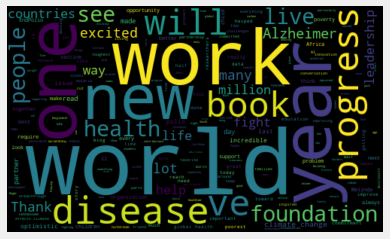

In [15]:
# plot word cloud
all_words = ' '.join([twts for twts in df['Tweets']])
word_cloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(all_words)

plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

- 'world', 'work', 'year', 'disease', 'one' are some words that are being used the most

In [16]:
# UDF to compute negative, neutral, and positive analysis
def get_analysis(score):
  if score < 0:
    return 'Negative'
  elif score > 0:
    return 'Positive'
  else:
    return 'Neutral'

# create new feature
df['Analysis'] = df['Polarity'].apply(get_analysis)

# preview dataset
df

,Tweets,Subjectivity,Polarity,Analysis
0,: The world must work together to slow the cor...,0.466667,-0.100000,Negative
1,Roger’s foundation partners with local NGOs...,0.279167,0.225000,Positive
2,I’m excited to team up with again for the Mat...,0.750000,0.375000,Positive
3,As we conclude our foundation’s second decade ...,0.166667,0.166667,Positive
4,"Thank you, Sue, for all of your contributions ...",1.000000,0.400000,Positive
...,...,...,...,...
95,I’ve always loved playing tennis. Maybe this i...,0.650000,0.600000,Positive
96,I am hopeful that we can substantially alter t...,0.250000,0.250000,Positive
97,The docuseries about my life and work is out t...,0.000000,0.000000,Neutral
98,Adapting to climate change requires support fr...,0.477273,0.318182,Positive


In [17]:
# print all positive tweets
j = 1
sorted_df = df.sort_values(by=['Polarity'])
for i in range(0, sorted_df.shape[0]):
  if(sorted_df['Analysis'][i] == 'Positive'):
    print(str(j)+ ') '+sorted_df['Tweets'][i])
    print()
    j = j+1

1)    Roger’s foundation partners with local NGOs in six countries in southern Africa to improve early learning and basic education. It’s an impressive organization, and I encourage you to consider supporting its work: 

2) I’m excited to team up with  again for the Match in Africa Friday in Cape Town. Playing alongside Roger is always a thrill, and I can’t wait to face off against  and . 

3) As we conclude our foundation’s second decade of work in global health and education, I have never been more optimistic about the opportunity to improve life for the world’s poorest. I look forward to partnering with you on the work ahead. 

4) Thank you, Sue, for all of your contributions to our foundation. I look forward to continuing our work together on important health and education projects that will improve lives. 

5) The world has only begun to tap into all the ways AI will help people live healthier lives. I’m excited about the launch of ’s new AI for Health initiative, which connects r

- 80 out of 100 tweets are positive

In [19]:
# print all negative tweets
j = 1
sorted_df = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sorted_df.shape[0]):
  if sorted_df['Analysis'][i] == 'Negative':
    print(str(j) + ") " + sorted_df['Tweets'][i])
    print()
    j = j+1

1) : The world must work together to slow the coronavirus outbreak, protect the most vulnerable, &amp; develop tools to control this ep…

2) Game on! 

3) It's great to see Microsoft's leadership in this area. Avoiding the worst effects of climate change will require innovation and investment to get us to net zero carbon emissions across all sectors of the economy. 

4) These global health heroes have helped Bangladesh become a model for other countries for how to respond to infectious disease outbreaks:  

5) It’s encouraging to see these results. Typhoid is especially deadly for young children, and a vaccine like this has the potential to save millions of lives. 

6) I was deeply moved by Tayari Jones’s story of a married couple whose lives get torn apart by an incident of injustice. The book is so well-written that you’ll find yourself sucked into it despite the heavy subject matter. 

7) In Abu Dhabi this week, the world committed $2.6B to EndPolio. Thank you  for your leadership i

- 10 out of 100 tweets are negative

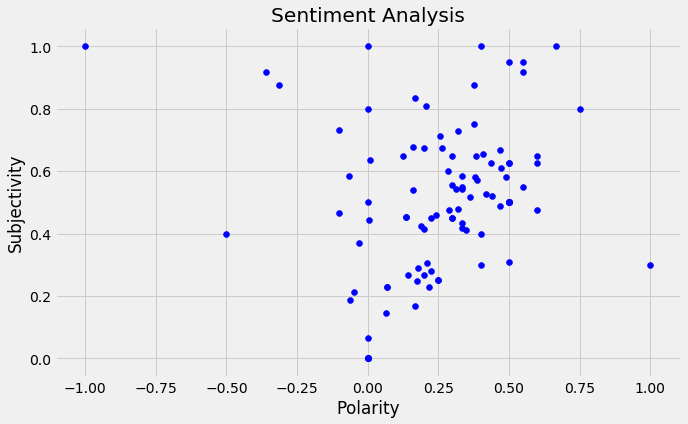

In [22]:
# plot the polarity and subjectivity
plt.figure(figsize=(10,6))
for i in range(0,df.shape[0]):
  plt.scatter(df["Polarity"][i], df['Subjectivity'][i], color='Blue')

plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

- maximum tweets are on the right (+ve polarity)

In [23]:
# print all positive tweets (alternate way)
ptweets = df[df['Analysis'] == 'Positive']
ptweets

,Tweets,Subjectivity,Polarity,Analysis
1,Roger’s foundation partners with local NGOs...,0.279167,0.225000,Positive
2,I’m excited to team up with again for the Mat...,0.750000,0.375000,Positive
3,As we conclude our foundation’s second decade ...,0.166667,0.166667,Positive
4,"Thank you, Sue, for all of your contributions ...",1.000000,0.400000,Positive
7,The world has only begun to tap into all the w...,0.676136,0.161932,Positive
...,...,...,...,...
91,: The third annual Goalkeepers19 event brings ...,0.227273,0.068182,Positive
95,I’ve always loved playing tennis. Maybe this i...,0.650000,0.600000,Positive
96,I am hopeful that we can substantially alter t...,0.250000,0.250000,Positive
98,Adapting to climate change requires support fr...,0.477273,0.318182,Positive


In [24]:
# percentage of positive tweets
round((ptweets.shape[0]/df.shape[0])*100, 2)

80.0

In [25]:
# percentage of negative tweets
ntweets = df[df['Analysis'] == 'Negative']
round((ntweets.shape[0]/df.shape[0])*100, 2)

10.0

In [30]:
# percentage of neutral tweets
neut_tweets = df[df['Analysis'] == 'Neutral']
round((neut_tweets.shape[0]/df.shape[0])*100, 2)

10.0

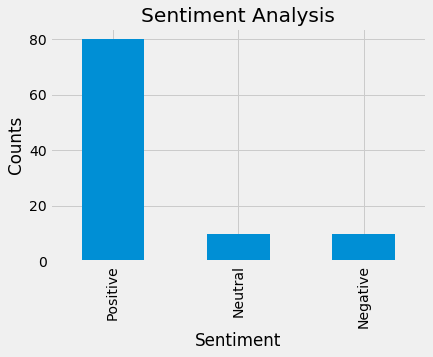

In [27]:
# show the value counts
df['Analysis'].value_counts()
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')